**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [3]:
from __future__ import print_function
# this is me
__author__ = "Sung Hoon Yang, CUSP NYU 2018"

# limit the number of same warnings to once
import warnings
warnings.filterwarnings(action='once')

## bread and butter
import sys
import numpy as np
import pandas as pd
import matplotlib
font = {'weight' : 'bold',
        'size'   : 88}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import os
"""
Set up PUIDATA env var
"""
os.environ["PUIDATA"] = "%s/fall18/PUI/PUIDATA"% os.getenv("HOME")
os.environ["PUI2018"] = "%s/fall18/PUI/PUI2018"% os.getenv("HOME")
%matplotlib inline
np.random.seed(999)

# Utilities
sys.path.insert(0, '/nfshome/shy256/util')
from puma_to_name import PUMA_TO_NAME
from pprint import pprint
import re
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from copy import deepcopy
import geopandas as gpd

/nfshome/shy256/.conda/envs/tf/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/nfshome/shy256/.conda/envs/tf/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [60]:
x = list(map(lambda x: x*10, range(1, 11)))
x = pd.Series(x)
a=0.8

y = line(a, x, errors=errors)
y

0     6.421409
1    10.033530
2    31.936643
3    30.159866
4    32.346900
5    35.737271
6    59.197564
7    64.157067
8    71.451282
9    88.179205
dtype: float64

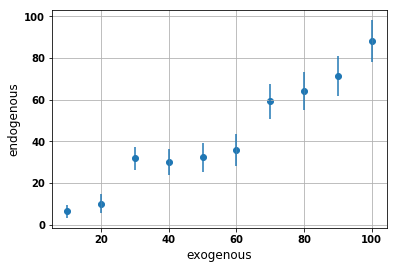

In [61]:
plt.scatter(x, y)
plt.errorbar(x, y, yerr=[np.sqrt(_x) for _x in x], fmt='none')
plt.grid()
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.show()

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [62]:
x_const = sm.add_constant(x)
print('\nY: ')
pprint(y) 
print('\nX: ')
pprint(x)
print('\nX with Constant: ')
pprint(x_const)


Y: 
0     6.421409
1    10.033530
2    31.936643
3    30.159866
4    32.346900
5    35.737271
6    59.197564
7    64.157067
8    71.451282
9    88.179205
dtype: float64

X: 
0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
dtype: int64

X with Constant: 
   const    0
0    1.0   10
1    1.0   20
2    1.0   30
3    1.0   40
4    1.0   50
5    1.0   60
6    1.0   70
7    1.0   80
8    1.0   90
9    1.0  100


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

#### a: wrong way

In [63]:
ols_a = sm.OLS(y, x)
res_a = ols_a.fit()
print(res_a.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     564.5
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.98e-09
Time:                        14:55:15   Log-Likelihood:                -32.516
No. Observations:                  10   AIC:                             67.03
Df Residuals:                       9   BIC:                             67.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7978      0.034     23.760      0.0

#### b: right way

In [64]:
ols_b = sm.OLS(y, x_const)
res_b = ols_b.fit()
print(res_b.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     138.6
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.48e-06
Time:                        14:55:24   Log-Likelihood:                -31.986
No. Observations:                  10   AIC:                             67.97
Df Residuals:                       8   BIC:                             68.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2829      4.527     -0.946      0.3

1. $R^2$ is lower for the OLS linear regression with a constant (bivariate has lower $R^2$ than univariate linear regression)
2. 95% confidence interval/standard error for the coefficient of x for the ols model (a) is much tighter than that of (b). The intercept prediction exhibits even wider confidence interval, which mars its useability. 
3. t-statistics are high for both models' exogenous variable. This makes sense because both are very close to the actual slope of 0.8


# 4. plot the data (as points) and both statsmodels fits

In [69]:
_df = pd.DataFrame(data={'x': x, 'y': y})
_df['ypred_a'] = res_a.predict()
_df['ypred_b'] = res_b.predict()
_df.head()

,x,y,ypred_a,ypred_b
0,10,6.421409,7.978153,4.307073
1,20,10.033530,15.956307,12.897073
2,30,31.936643,23.934460,21.487073
3,40,30.159866,31.912614,30.077073
4,50,32.346900,39.890767,38.667074


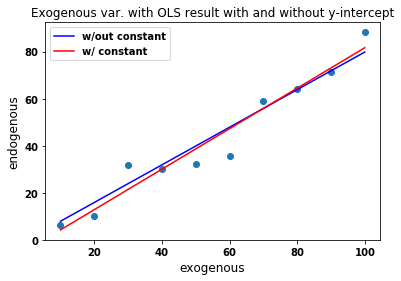

In [72]:
plt.scatter(x, y)
plt.plot(_df.x,_df.ypred_a, 'b', label='w/out constant') 
plt.plot(_df.x,_df.ypred_b, 'r', label='w/ constant') 
plt.legend()
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('Exogenous var. with OLS result with and without y-intercept')
plt.show()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [85]:
a = 0.8
b = 100 * a + 1
print('slope and y-intercept')
print(a, '|', icpt)
y = line(a, x, b, errors=errors)
print('Endogenous Variable Values')
y

slope and y-intercept
0.8 | 81.0
Endogenous Variable Values


0     89.843256
1     97.185768
2    102.310933
3    105.474034
4    115.375098
5    138.053998
6    125.379274
7    120.412196
8    143.708368
9    170.408237
dtype: float64

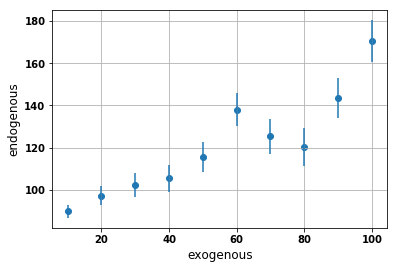

In [86]:
plt.scatter(x, y)
plt.errorbar(x, y, yerr=[np.sqrt(_x) for _x in x], fmt='none')
plt.grid()
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.show()

# 6. repeat step 3

#### a: wrong way

In [87]:
ols_a = sm.OLS(y, x)
res_a = ols_a.fit()
print(res_a.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     84.24
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           7.27e-06
Time:                        15:06:38   Log-Likelihood:                -50.625
No. Observations:                  10   AIC:                             103.2
Df Residuals:                       9   BIC:                             103.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8848      0.205      9.178      0.0

/nfshome/shy256/.conda/envs/tf/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### b: right way

In [88]:
ols_b = sm.OLS(y, x_const)
res_b = ols_b.fit()
print(res_b.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     40.81
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           0.000212
Time:                        15:06:51   Log-Likelihood:                -36.629
No. Observations:                  10   AIC:                             77.26
Df Residuals:                       8   BIC:                             77.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.0270      7.203     11.110      0.0

1. $R^2$ is lower for the OLS linear regression with a constant (bivariate has lower $R^2$ than univariate linear regression)
2. 95% confidence interval/standard error for the coefficient of x for the ols model (a) is much tighter than that of (b). 
3. t-statistics are high for both models' exogenous variable. This makes sense because both are very close to the actual slope of 0.8
4. **UNLIKE** Step 3, the intercept prediction exhibits a tighter confidence interval. the standard error shows improvement, as the std err is much smaller compared to the mean value of the coefficient with this (slope, intercept) pair.


# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [89]:
from statsmodels.regression.linear_model import WLS

In [99]:
w = errors(x_const).mean() ** 2
w = w.values[1]
w

50.4823524652655

In [100]:
1.0/w

0.019808902540507642

In [101]:
model = WLS(y, x_const, weights=1.0/w).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            WLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     40.81
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           0.000212
Time:                        15:55:48   Log-Likelihood:                -36.629
No. Observations:                  10   AIC:                             77.26
Df Residuals:                       8   BIC:                             77.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.0270      7.203     11.110      0.000      63.417      96.637
0              0.7416      0.116      6.388      0.000       0.474       1.009
==============================================================================
Omnibus:                        0.683   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.005
Skew:                          -0.050   Prob(JB):                        0.998
Kurtosis:                       2.956   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

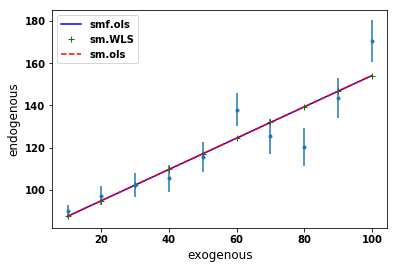

In [113]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfmodel.fittedvalues, 'b-', label="smf.ols")
pl.plot(x, model.fittedvalues, 'g+', label="sm.WLS")
pl.plot(x, res_b.fittedvalues, 'r--', label="sm.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

In [ ]:
## End of Notebook